# Ідентифікація та обробка аномалій (викидів)

Викиди в даних можуть бути палицею з двома кінцями для проектів машинного навчання. З одного боку, вони можуть представляти цінні екстремуми або аномалії, які містять важливу інформацію. З іншого боку, вони можуть спотворити аналіз, що призведе до менш точних моделей. Проблема полягає в тому, щоб визначити, коли потрібно коригувати, а коли залишати, і як ефективно обробляти ці відхилення.

**Викид** - це спостереження, яке значно відхиляється від інших спостережень у наборі даних. Вони можуть виникати через помилки вимірювання, помилки введення даних або реальну мінливість у наборі даних. Виявлення викидів - це перший крок у роботі з ними, який можна здійснити за допомогою різних статистичних методів і технік візуалізації, таких як box plots, діаграми розсіювання та Z-рахунки.

## Різні типи викидів

Слід розрізняти **одновимірні** та **багатовимірні** викиди. Одновимірні викиди - це екстремальні значення в розподілі певної змінної, тоді як багатовимірні викиди - це комбінація значень у спостереженні, яка є малоймовірною. Наприклад, одновимірним викидом може бути показник віку людини 120 років або показник температури в Антарктиді 50 градусів за Цельсієм.

Багатовимірним викидом може бути спостереження за людиною, зріст якої становить 2 метри (у 95-му процентилі), а вага - 50 кг (у 5-му процентилі). Обидва типи відхилень можуть вплинути на результат аналізу, але виявляються і обробляються по-різному.

## Виявлення одномірних викидів

Викиди можна виявити різними способами, включаючи статистичні методи, методи, засновані на близькості, або контрольоване виявлення випадкових даних. Зосередимося на статичних методах.

Використаємо набір даних `Boston Housing` у якості прикладу:

In [23]:
# Завантажуємо бібліотеки

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Завантажуємо дані
X, y = load_boston(return_X_y=True)

# Створити DataFrame
boston = load_boston()
columns = boston.feature_names
df = pd.DataFrame(X, columns = columns)

print(df[:10])

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
5     18.7  394.1

Першим і корисним кроком у виявленні одновимірних викидів є візуалізація розподілу змінних. Зазвичай, при проведенні попередньої обробки даних це потрібно зробити для всіх цікавих змінних набору даних окремо. Простим способом візуального узагальнення розподілу змінної є **box plot** (діаграма розмаху, коробковий графік або "ящик з вусами").

У коробковому графіку, запровадженому Джоном Тьюкі в 1970 році, дані поділяються на квартилі. Зазвичай він показує прямокутну рамку, що представляє 25%-75% спостережень вибірки, розширену так званими вусами, які досягають мінімального і максимального значення даних. Спостереження, показані за межами вусів, є викидами.

На графіку нижче показано більшість змінних, включених до набору даних про житловий фонд Бостона. Щоб отримати швидкий огляд розподілу всіх змінних, ви можете скористатися груповою діаграмою. Майте на увазі, що змінні можуть відрізнятися за масштабом, і додавання всіх змінних в одну сітку може призвести до того, що діаграми буде важко читати. 

Ось приклад змінних середнього масштабу:

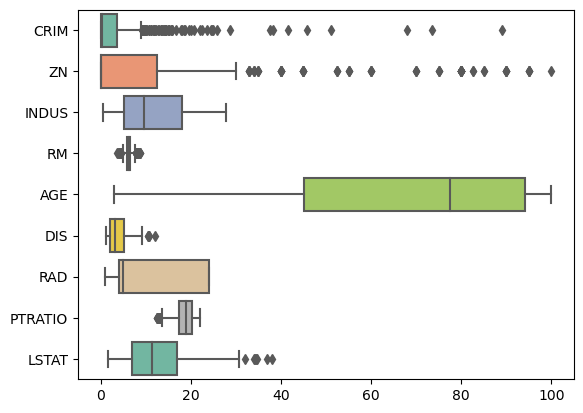

In [24]:
df_1 = df[['TAX', 'B']]
df_2 = df[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO','LSTAT']]
df_3 = df[['CHAS', 'NOX']]

ax = sns.boxplot(data=df_2, orient="h", palette="Set2")

Виявляється, що є три змінні, а саме: `AGE`, `INDUS` та `RAD`, які не мають одномірних спостережень, що відхиляються від норми. Решта змінних мають точки даних, що виходять за межі їхніх вусів. Розглянемо ближче змінну `CRIM`, яка кодує рівень злочинності на душу населення за містами. Наведений нижче індивідуальний графік показує, що рівень злочинності в більшості міст є нижчим за 5%.

Text(0.5, 0, 'Рівень злочинності на душу населення')

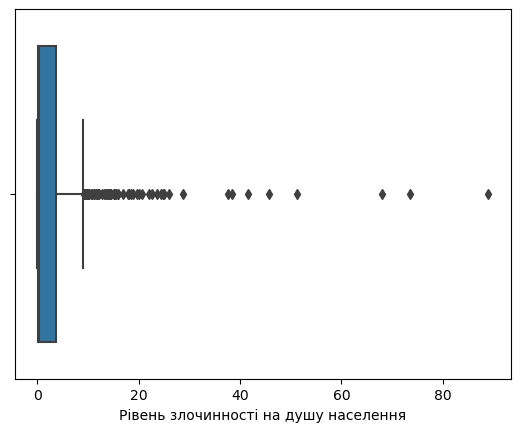

In [25]:
ax = sns.boxplot(x=df["CRIM"])
ax.set_xlabel('Рівень злочинності на душу населення')

Коробкові діаграми чудово підходять для простого та швидкого узагальнення та візуалізації розподілу змінних. Однак вони не визначають фактичні показники віддалених спостережень. Розглянемо три кількісні методи, які зазвичай використовуються в статистиці для виявлення одновимірних викидів: 

- метод коробкової діаграми Тьюкі;
- метод z-рахунку;
- метод медіанного абсолютного відхилення.

### Метод коробкової діаграми Тьюкі

Окрім візуальних переваг, діаграма Тьюкі надає корисну статистику для визначення окремих спостережень як викидів. Тьюкі розрізняє можливі та ймовірні викиди. Можливий викид знаходиться між внутрішньою та зовнішньою межами, тоді як ймовірний викид знаходиться за межами зовнішньої межі.

<div style="text-align: center;">
    <img src="assets/image_0006.png" style="max-width:800px;width:100%">
</div>

Приклад діаграми, що включає внутрішню та зовнішню огорожі, а також мінімальні та максимальні спостереження (відомі як "вуса"). Хоча внутрішня (яку часто плутають з вусами) і зовнішня огорожа зазвичай не показані на фактичному графіку, їх можна розрахувати за допомогою інтерквартильного розмаху (IQR), як це показано нижче:


`IQR = Q3 - Q1, де q3 := 75th quartile а q1 := 25th quartile`

`Inner fence = [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]`

`Outer fence = [Q1 – 3 * IQR, Q3 + 3 * IQR]`

Внутрішня межа розподілу визначається як 1,5 x IQR нижче 1-го кварталу та 1,5 x IQR вище 3-го кварталу. Зовнішня межа визначається як 3 x IQR нижче 1-го кварталу та 3 x IQR вище 3-го кварталу. За Тьюкі обробляються лише ймовірні викиди, які знаходяться за межами зовнішньої межі.






In [26]:
def tukeys_method(df, variable):
    # Приймає два параметри: фрейм даних та змінну, що цікавить, як рядок
    
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    # Внутрішня огорожа нижній і верхній кінець
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    # Зовнішня огорожа нижній і верхній кінець
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "CRIM")
print(probable_outliers_tm)

[374, 375, 376, 378, 379, 380, 381, 384, 385, 386, 387, 398, 400, 403, 404, 405, 406, 410, 412, 413, 414, 415, 417, 418, 425, 427, 437, 440, 468, 477]


30 спостережень змінної "рівень злочинності на душу населення по містах" можна розглядати як ймовірні, а 66 - як можливі викиди, які потребують подальшої уваги. Ви можете легко знайти викиди всіх інших змінних у наборі даних, викликавши функцію `tukeys_method()` для кожної змінної.

Великою перевагою методу Тьюкі є те, що статистичні дані (наприклад, IQR, внутрішня та зовнішня огорожа) є стійкими до викидів, тобто знаходження одного викиду не залежить від усіх інших викидів. Крім того, статистику легко обчислити.

Крім того, цей метод не вимагає нормального розподілу даних, що часто не гарантується в реальних умовах. Якщо розподіл сильно асиметричний (що зазвичай зустрічається в реальних даних), метод Тьюкі можна розширити до методу `log-IQ`. Тут кожне значення перетворюється на його логарифм перед тим, як обчислювати внутрішній і зовнішній бар'єри.

[]
[380, 404, 405, 410, 414, 418]


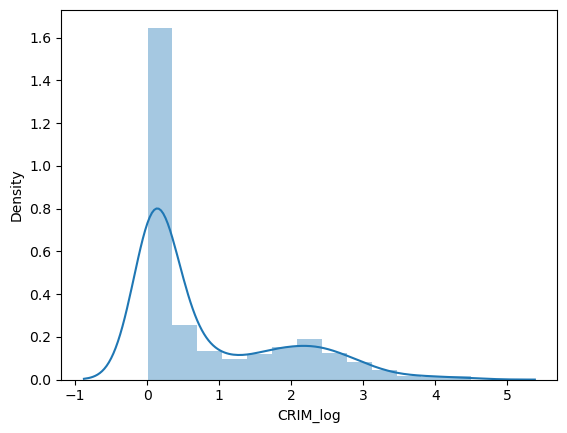

In [27]:
# Перетворити 'CRIM' на log 
log_CRIM = np.log(df['CRIM'])
df['CRIM_man'] = df['CRIM']+1
log_CRIM = np.log(df['CRIM_man'])
df['CRIM_log'] = log_CRIM

# Діаграма
sns.distplot(df['CRIM_log'])

# Розрахувати ймовірні та можливі викиди за допомогою методу log-iq
probable_outliers_logiq, possible_outliers_logiq = tukeys_method(df, 'CRIM_log')
print(probable_outliers_logiq)
print(possible_outliers_logiq)

### Метод z-рахунку

Іншим поширеним методом виявлення одновимірних викидів є внутрішньо стандартизовані залишки, або метод z-рахунку. Для кожного спостереження вимірюється, на скільки стандартних відхилень точка даних відрізняється від свого середнього значення.
За загальним емпіричним правилом, якщо `z > C`, де `C` зазвичай дорівнює `3`, спостереження позначається як викид. Це правило випливає з того, що якщо змінна розподілена нормально, то 99.7% всіх точок даних розташовані на відстані 3 стандартних відхилень від середнього значення. Давайте подивимось на нашому прикладі, які спостереження `CRIM` визначаються як викиди за допомогою z-рахунку

In [28]:
def z_score_method(frame, variable_name):
    # Приймає два параметри: фрейм даних та змінну, що цікавить, як рядок
    columns = frame.columns
    z = np.abs(stats.zscore(frame))
    threshold = 3

    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

outlier_z = z_score_method(df, 'CRIM')
print(outlier_z)

InvalidIndexError: (slice(None, None, None), 0)

При використанні методу z-рахунку 8 спостережень позначаються як викиди. Однак цей метод є дуже обмеженим, оскільки середнє значення розподілу та стандартне відхилення є чутливими до викидів. Це означає, що знаходження одного викиду залежить від інших викидів, оскільки кожне спостереження безпосередньо впливає на середнє значення. Крім того, метод z-критерію передбачає, що змінна, яка нас цікавить, розподілена нормально.

### Метод медіанного абсолютного відхилення (Median Absolute Deviation, MAD)

Метод медіанного абсолютного відхилення замінює середнє та стандартне відхилення більш надійними статистичними показниками, такими як медіана та медіанне абсолютне відхилення. Медіанне абсолютне відхилення визначається як:

$MAD = median(|X_i-\bar{X}|)$

Тестова статистика обчислюється так само, як і z-рахунок, з використанням робастної статистики. Крім того, для виявлення викидів використовується та сама точка відсікання 3. Якщо тестова статистика перевищує 3, вона позначається як викид.

Порівняно з внутрішнім (z-критерієм) та зовнішнім методом залишків, цей метод є більш стійким до викидів і припускає, що `X` є параметрично розподіленою величиною:

In [ ]:
def mad_method(df, variable_name):
    # Приймає два параметри: фрейм даних та змінну, що цікавить, як рядок
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_abs_deviation(df))
    threshold = 3
    
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

outlier_mad = mad_method(df, 'CRIM')
print(outlier_mad)

[16, 20, 22, 23, 27, 29, 30, 31, 32, 33, 34, 131, 134, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 310, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487]


Існують різні способи виявлення одновимірних відхилень, кожен з яких має свої переваги та недоліки. Z-критерій потрібно застосовувати дуже обережно через його чутливість до середнього значення та стандартного відхилення, а також через припущення про нормальний розподіл змінної. Замість нього часто використовують метод MAD, який є більш надійною альтернативою. Метод бокс-діаграм Тьюкі дає надійні результати і може бути легко розширений, якщо дані сильно асиметричні.

## Стратегії роботи з викидами

Підхід до обробки викидів залежить від їхньої природи та впливу на ваші дані і продуктивність моделі. Нижче наведено кілька стратегій:

- обрізання або видалення пропусків: цей спосіб підходить, коли пропуски ідентифіковані як шум. Їх видалення може підвищити точність моделі, але може призвести до втрати цінної інформації в певних контекстах;
- обмеження: застосовуючи поріг, значення, що виходять за певні межі, обмежуються максимальним або мінімальним значенням. Цей метод зберігає викиди в наборі даних, але обмежує їхній вплив;
- перетворення: застосування таких перетворень, як логарифмічне, квадратний корінь або Бокса-Кокса, може зменшити вплив пропусків шляхом коригування масштабу точок даних;
- інтерполяція: у деяких випадках заміна пропусків медіаною або середнім значенням (для цієї ознаки) може бути ефективною, особливо якщо припускається, що пропуски є помилками;
- використання робастних моделей: певні моделі менш чутливі до пропусків, наприклад, випадкові ліси або моделі, що використовують функції втрат на основі медіани. Використання цих моделей може пом'якшити вплив пропусків.

Ігнорування викидів та обробка викидів може мати ризик суттєвого впливу на результати аналізу або моделі машинного навчання. На практиці часто не дуже зрозуміло, що робити з викидами спостережень.

З математичної точки зору не існує правильної чи неправильної відповіді на те, як поводитися з викидами. Більш важливу роль, поряд з математикою, можна відвести якісній інформації, яку ви маєте в своєму розпорядженні в процесі прийняття рішень щодо пропусків. Наприклад, знання того, як саме виникло відхилення, може бути корисним для прийняття рішень щодо екстремальних значень.

Як вже було сказано раніше, помилковий викид - це спостереження, яке є результатом неточного вимірювання, неправильного введення даних або маніпуляції з даними. У цьому випадку ці точки даних, як правило, не є частиною генеральної сукупності, що нас цікавить.

З іншого боку, не пов'язані з помилками викиди, які також називають цікавими або випадковими викидами, є частиною генеральної сукупності, що нас цікавить, і можуть містити цікаву інформацію.

### Обробка помилкових викидів

Помилкові викиди слід або видалити, або виправити. Найпростіше видалити спостереження, які виникли через неточні вимірювання або маніпуляції з даними. Припустімо, що існує сира версія базових даних. У такому випадку, можливо, варто відстежити початковий запис точки даних, щоб уникнути значної втрати інформації через видалення.

Однак, якщо ви не маєте під рукою сирої версії даних, але впевнені, що маєте справу з помилкою (наприклад, вимірювання зросту людини 4 метри 200 дюймів або четвертий клас виміру, хоча ви знаєте, що має бути лише три класи змінної), найкращим варіантом буде просто видалити ці записи.

### Обробка непомилкових викидів

Існує три різних варіанти того, як поводитися з непомилковими викидами:

- Зберегти;
- Видалити;
- Перекодувати.

#### Зберегти

Якщо більшість виявлених відхилень не є помилковими і по праву належать до генеральної сукупності, що нас цікавить, це хороша стратегія. Крім того, часто нелегко визначити, чи належить екстремальне значення до генеральної сукупності, яка нас цікавить, чи ні.

Зберігаючи викиди, пам'ятайте, що вони можуть спотворити результати вашого завдання: наприклад, призвести до відхилення нульової гіпотези або надто оптимістичного прогнозу. Тому, можливо, вам варто повідомити про свої висновки, включно з викидами та виключенням викидів, щоб підкреслити вплив, який вони можуть мати.

Іншим варіантом є надійні методи для вашого завдання прогнозування або аналізу. Ці методи зменшують вплив екстремальних значень, використовуючи більш надійну статистику (наприклад, медіану) або інші непараметричні параметри (наприклад, рангові тести, бутстрапінг або машини опорних векторів).

#### Видалити

Найпростіший варіант - видалити будь-яке спостереження, що не відповідає дійсності. Однак ця стратегія має високий ризик втрати інформації. Особливо, якщо ви знаходите багато точок, що виходять за межі даних, намагайтеся уникати цього. Крім того, видалення цікавих і впливових пропусків (точок, які належать до сукупності, що вас цікавить) може хибно вплинути на будь-який результат, наприклад, на прогноз або результат тесту, якого ви прагнете досягти.

Поради:

- видаляйте пропуски низького масштабу і ті, які, ймовірно, не належать до іншої сукупності;
- якщо ви обираєте видалення, завжди надавайте два звіти про ваш аналіз або результати: один з пропущеними спостереженнями і один без них.

#### Перекодування

Перекодування пропусків є хорошим варіантом для обробки пропусків і одночасного збереження якомога більшої кількості інформації. Цей варіант завжди повинен супроводжуватися обґрунтованими міркуваннями та поясненнями. Існує два широко використовуваних метода:

- Вінсоризація;
- Імпутація.

##### Вінсоризація

При вінсоризації будь-яке значення змінної вище або нижче процентиля k по обидва боки розподілу змінних замінюється значенням самого k-го процентиля. Наприклад, якщо `k=5`, всі спостереження вище 95-го процентиля перекодовуються у значення 95-го процентиля, а значення нижче 5-го процентиля перекодовуються відповідно. Порівняно з обрізанням, вінсоризація є менш екстремальним варіантом, оскільки перекодовує викиди, а не відсікає їх повністю.

Вінсоризація також безпосередньо втручається в процес виявлення викидів. Точки даних, що перевищують або не перевищують певний поріг, обробляються, і немає необхідності в застосуванні незалежного методу виявлення. Однак він йде рука об руку з методом Тьюкі, оскільки k часто рекомендується встановлювати на рівні зовнішньої межі вибірки (3 стандартних відхилення навколо середнього значення). Найчастіше це `k=5` і, отже, використовується як значення за замовчуванням.

Спочатку визначимо зовншіню огорожу:

In [ ]:
def fences(df, variable_name):    
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(df, 'CRIM')

print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  -10.7030675
Upper end outer fence:  14.462195000000001


Верхня зовнішня межа для змінної `CRIM` становить приблизно 14.46, тоді як нижня межа є нижчою за нуль. Оскільки рівень злочинності нижче нуля не є значущим, дані слід вінсоризувати лише по правому хвосту. Тепер ми можемо подивитися на значення в різних процентилях, щоб встановити `k`:

In [ ]:
# Дослідження різних квантилей у верхній частині
print('90% quantile:   ', df['CRIM'].quantile(0.90))
print('92.5% quantile: ', df['CRIM'].quantile(0.925))
print('95% quantile:   ', df['CRIM'].quantile(0.95))
print('97.5% quantile: ', df['CRIM'].quantile(0.975))
print('99% quantile:   ', df['CRIM'].quantile(0.99))
print('99.9% quantile: ', df['CRIM'].quantile(0.999))

90% quantile:    10.753
92.5% quantile:  13.5416875
95% quantile:    15.78915
97.5% quantile:  23.927799999999998
99% quantile:    41.37032999999997
99.9% quantile:  81.17793950000095


Схоже, що значення 92.5% (13.54) та 95% (15.79) є найближчими до верхньої зовнішньої огорожі. Оскільки 95% зустрічається частіше, будемо вінсорізувати дані для `k=5` за допомогою функції `winsorize()` з бібліотеки scipy

<AxesSubplot:xlabel='CRIM_wins_925%', ylabel='Density'>

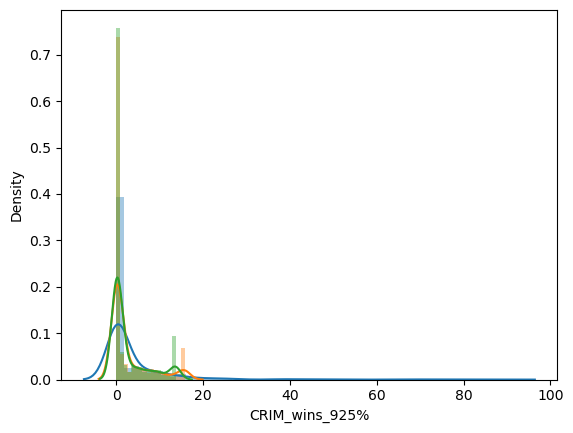

In [ ]:
from scipy.stats.mstats import winsorize

# Створити копію df
df_win = df.copy(deep=True)

# Вінсоризація по правому хвосту
df_win['CRIM_wins_95%'] = winsorize(df['CRIM'], limits=(0, 0.05))
df_win['CRIM_wins_925%'] = winsorize(df['CRIM'], limits=(0, 0.075))

df_win.describe()

# Графік розподілу: Рівень злочинності на душу населення за містами
sns.distplot(df['CRIM'])

# Графіки нового розподілення
sns.distplot(df_win['CRIM_wins_95%'])
sns.distplot(df_win['CRIM_wins_925%'])